In [1]:
# not usable on the long run as it's too long to query data
# doesn't generate errors which make the algo not error friendly
# not possible to ask with a "period" flag

In [58]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
from utils import Timer
import yfinance as yf
ALPHAVANTAGE_API_KEY = "E2S9WCQXMIMBMR61"

In [75]:
# Retrieving tickers symbols

# stocks
stock_list = pd.read_csv('data_finance/stocks.csv')['symbol_yf'].tolist()
# index
index_csv = pd.read_csv('data_finance/index.csv')
pref_index = ['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225']
index_list = index_csv[index_csv['symbol_yf'].isin(['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225'])]['symbol_yf'].tolist()
# currency
currency_list = pd.read_csv('data_finance/currencies.csv')['symbol_yf'].tolist()

[*********************100%***********************]  15 of 15 completed
[Import performance with yfinance lib:]
Elapsed: 0.6527900695800781


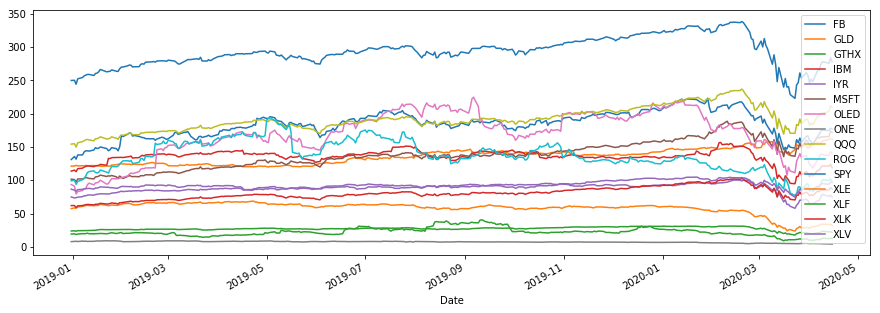

In [95]:
# yfinance import

with Timer.Timer("Import performance with yfinance lib:"): 
    data = yf.download(stock_list, start='2019-1-1', thread = 1)
    data['Close'].plot()

[Import performance with pandas_datareader lib:]
Elapsed: 7.98178505897522


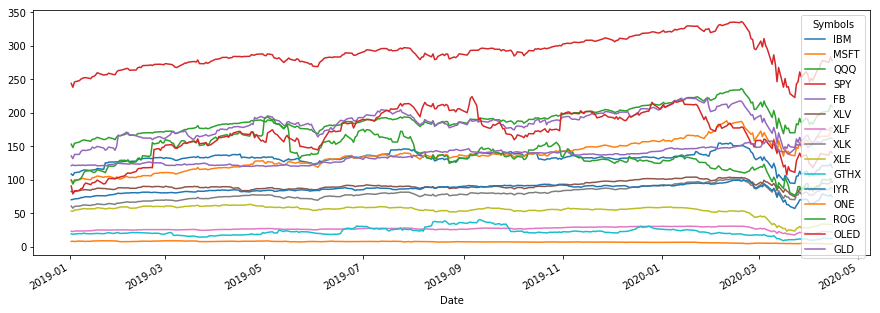

In [61]:
# pandas_datareader import

with Timer.Timer("Import performance with pandas_datareader lib:"): 
    data = web.DataReader(stock_list, data_source='yahoo', start='2019-1-1')
    data['Adj Close'].plot()

In [98]:
# pandas_datareader import
stockList = []
with Timer.Timer("Import performance with pandas_datareader lib:"): 
    stockList.insert(web.DataReader('MSFT', data_source='av-daily', start='2019-1-1', api_key=ALPHAVANTAGE_API_KEY))


[Import performance with pandas_datareader lib:]
Elapsed: 1.716667890548706


TypeError: insert() takes exactly 2 arguments (1 given)

[Import performance with pandas_datareader FRED:]
Elapsed: 0.3667728900909424


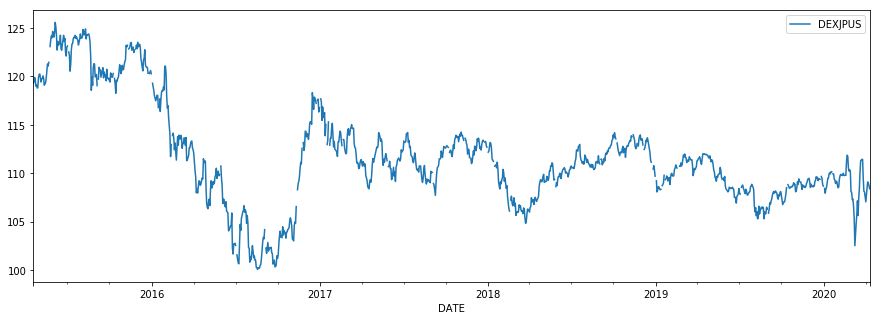

In [74]:
with Timer.Timer("Import performance with pandas_datareader FRED:"): 
    jpy = web.DataReader('DEXJPUS', 'fred')
    jpy.plot()

In [86]:
data

,open,high,low,close,volume
2019-01-02,99.55,101.7500,98.9400,101.12,35329345
2019-01-03,100.10,100.1850,97.2000,97.40,42578410
2019-01-04,99.72,102.5100,98.9300,101.93,44060620
2019-01-07,101.64,103.2681,100.9800,102.06,35656136
2019-01-08,103.04,103.9700,101.7134,102.80,31514415
...,...,...,...,...,...
2020-04-08,165.67,166.6700,163.5000,165.13,48318234
2020-04-09,166.36,167.3700,163.3300,165.14,51431775
2020-04-13,164.35,165.5700,162.3000,165.51,41905264
2020-04-14,169.00,173.7500,168.0000,173.70,52874338


In [93]:
for stock in stocks:
    ticker = web.DataReader(["AAPL", "TSLA"], data_source='av-daily', start='2019-1-1', api_key=ALPHAVANTAGE_API_KEY)

    print(stock)
    print('Prior Close')

In [99]:
stockList

[]

In [106]:
data = web.DataReader('^VXAZN', data_source='yahoo', start='2019-1-1', api_key=ALPHAVANTAGE_API_KEY)

data = web.DataReader('VXIBMCLS', data_source='fred', start='2010-1-1', api_key=ALPHAVANTAGE_API_KEY)


In [107]:
data

,VXIBMCLS
DATE,
2010-06-01,31.08
2010-06-02,27.64
2010-06-03,27.04
2010-06-04,31.56
2010-06-07,32.83
...,...
2020-04-08,52.56
2020-04-09,53.76
2020-04-10,NaN
